In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import json
from openslide import OpenSlide
import numpy as np

In [2]:
import torch

In [41]:
root_path='/home1/ravi/Desktop/hpv_project/manual_annotations'
geojson_path='/home1/ravi/Desktop/hpv_project/manual_annotations/TCGA-CN-5366-01Z-00-DX1.geojson'
wsi_path=geojson_path.replace('.geojson','.svs')
print(wsi_path)
data = json.load(open(geojson_path))
num_annot=len(data['features']) 
print(f'no of annotations are {num_annot}')
wsi = OpenSlide(wsi_path)
w, h = wsi.dimensions
w, h = w//256, h//256
mask_t = np.zeros((h, w))
mask_nt = np.zeros((h, w))

/home1/ravi/Desktop/hpv_project/manual_annotations/TCGA-CN-5366-01Z-00-DX1.svs
no of annotations are 46


In [42]:
for d in data['features']:
    cl=d['properties']['classification']['name']
    type=d['geometry']['type']
    print(f' class is {cl} and type is {type}')
    

 class is Tumor Epithelium and type is Polygon
 class is adipose and type is Polygon
 class is salivary glands and type is Polygon
 class is salivary glands and type is Polygon
 class is salivary glands and type is Polygon
 class is salivary glands and type is Polygon
 class is salivary glands and type is Polygon
 class is salivary glands and type is Polygon
 class is salivary glands and type is Polygon
 class is salivary glands and type is Polygon
 class is adipose and type is Polygon
 class is Tumor Epithelium and type is MultiPolygon
 class is benign squamous mucosa and type is Polygon
 class is benign squamous mucosa and type is Polygon
 class is normal connective tissue and type is Polygon
 class is normal connective tissue and type is Polygon
 class is normal connective tissue and type is Polygon
 class is nerve and type is Polygon
 class is blood vessels and type is Polygon
 class is nerve and type is Polygon
 class is Tumor Stroma and type is Polygon
 class is Tumor Stroma and 

In [43]:
#### this piece of code will generates a mask if class is Tumor Epithelium
for item in data['features']:
    class_name = item['properties']['classification']['name']
    type_ = item['geometry']['type']
    if not class_name=='Tumor Epithelium':continue
    if type_ == 'Polygon':
        cnt = item['geometry']['coordinates']
        for idx, c in enumerate(cnt):
            c = np.array(c)//256
            if idx == 0: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 1, -1)
            else: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 0, -1)
    if type_ == 'MultiPolygon':
        for cnt in item['geometry']['coordinates']:
            for idx, c in enumerate(cnt):
                c = np.array(c)//256
                if idx == 0: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 1, -1)
                else: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 0, -1)
    else:
        print(f'failed with {class_name} and {type}')
        pass

failed with Tumor Epithelium and Polygon


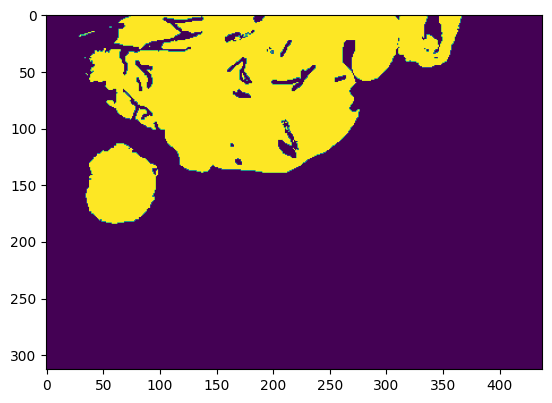

In [44]:
plt.imshow(mask_t)

In [45]:
dim1, dim2 = np.where(mask_t>0)
print(dim1.shape,dim2.shape)
dim1, dim2 = dim1*256, dim2*256
print(dim1[0:500],dim2[0:500])

(31593,) (31593,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 

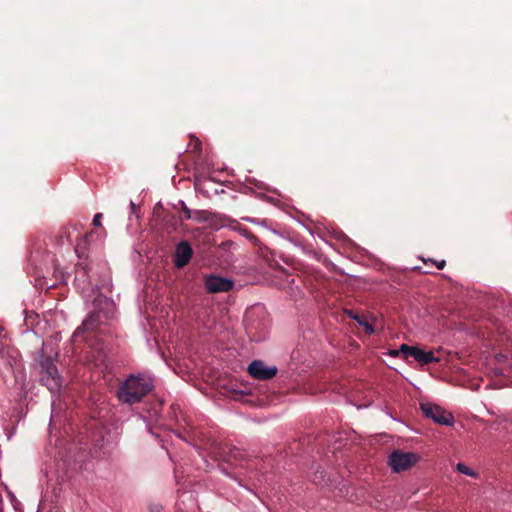

In [46]:
wsi.read_region((29440, 0), 0, (512, 512))

In [32]:
import pandas as pd

In [33]:
df_t=pd.DataFrame({'dim1': dim1, 'dim2':dim2})

In [34]:
wsi_name=wsi_path.split('/')[-1].split('-')
wsi_name=wsi_name[0]+'-'+wsi_name[1]+'-'+wsi_name[2]
# print(wsi_name)
df_t.to_csv(f'./coords/tumor/{wsi_name}_tumor.csv', index=False)

In [35]:
###### for  non_tumor class

In [36]:
for item in data['features']:
    class_name = item['properties']['classification']['name']
    type_ = item['geometry']['type']
    if class_name=='Tumor Epithelium':continue
    if type_ == 'Polygon':
        cnt = item['geometry']['coordinates']
        for idx, c in enumerate(cnt):
            c = np.array(c)//256
            if idx == 0: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 1, -1)
            else: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 0, -1)
    if type_ == 'MultiPolygon':
        for cnt in item['geometry']['coordinates']:
            for idx, c in enumerate(cnt):
                c = np.array(c)//256
                if idx == 0: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 1, -1)
                else: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 0, -1)
    else:
        print(f'fail with {class_name} and type is {type}')
        pass

fail with adipose and type is Polygon
fail with salivary glands and type is Polygon
fail with salivary glands and type is Polygon
fail with salivary glands and type is Polygon
fail with salivary glands and type is Polygon
fail with salivary glands and type is Polygon
fail with salivary glands and type is Polygon
fail with salivary glands and type is Polygon
fail with salivary glands and type is Polygon
fail with adipose and type is Polygon
fail with benign squamous mucosa and type is Polygon
fail with benign squamous mucosa and type is Polygon
fail with normal connective tissue and type is Polygon
fail with normal connective tissue and type is Polygon
fail with normal connective tissue and type is Polygon
fail with nerve and type is Polygon
fail with blood vessels and type is Polygon
fail with nerve and type is Polygon
fail with Tumor Stroma and type is Polygon
fail with nerve and type is Polygon
fail with nerve and type is Polygon
fail with nerve and type is Polygon
fail with nerve an

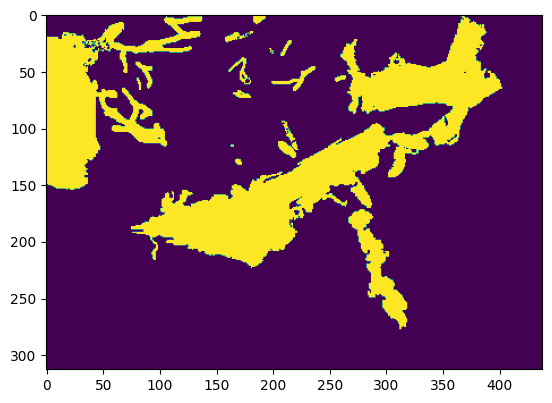

In [37]:
plt.imshow(mask_nt)

In [38]:
dim1, dim2 = np.where(mask_nt>0)
dim1, dim2 = dim1*256, dim2*256

In [39]:
df_nt=pd.DataFrame({'dim1': dim1, 'dim2':dim2})

In [40]:
wsi_name=wsi_path.split('/')[-1].split('-')
wsi_name=wsi_name[0]+'-'+wsi_name[1]+'-'+wsi_name[2]
# print(wsi_name)
df_nt.to_csv(f'./coords/non_tumor/{wsi_name}_non_tumor.csv', index=False)

In [1]:
pwd

'/home1/ravi/Desktop/hpv_project/tum_ntum'

In [18]:
#### if polygon have negative contr

In [19]:
for item in data['features']:
    try:
        # if polygon
        class_name = item['properties']['classification']['name']
        if not class_name == 'Tumor Epithelium': continue
        pos_cnt = item['geometry']['coordinates'][0]   #first one is outer cnt
        neg_cnts = item['geometry']['coordinates'][1:]  ###1 and next are negative polygon
        cnt = np.array(cnt)//256
        mask = cv2.drawContours(mask_t, [pos_cnt.astype(int)], -1, 1, -1)
        for neg_cnt in neg_cnts:
            mask = cv2.drawContours(mask_t, [neg_cnt.astype(int)], -1, 0, -1)
    except:
        pass